In [1]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import csv

C:\Users\kylem\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kylem\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\kylem\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
tmps = []
for f in ['u','g','r','i','z']:
    templets = glob('templ/*{}.dat'.format(f))
    tmp = np.zeros((len(templets),501,2))
    
    for i in range(len(templets)):
        tmp[i] = np.concatenate((np.array([[0,0]]),
                                 np.array(pd.read_csv(templets[i],sep=' ')),
                                 np.array([[1,0]])))
    
    tmps.append(tmp)

In [3]:
first = True
newtmps = []
with open('newtemps.txt', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ',skipinitialspace=True)
    for row in csvreader:
        if first:
            first = False
            continue
        newtmps.append(row[:11])
newtmps = np.array(newtmps,dtype=np.float32)
ntmptags = ['RRa1','RRa2','RRa3','RRb1','RRb2','RRb3','RRc','sin','W UMa','Algol']

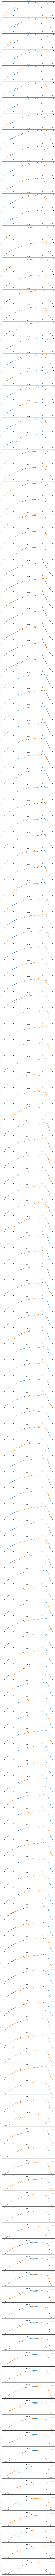

In [6]:
tmp = tmps[1]
fig, ax = plt.subplots(len(tmp)*7,figsize=(15,750))
for j in range(len(tmp)):
    for i in range(7):
        ax[7*j+i].plot(tmp[j][:,0],tmp[j][:,1],label='old')
        ax[7*j+i].plot(newtmps[:,0],newtmps[:,i+1]+1,label='new')
        ax[7*j+i].set_title("{} - {}".format(ntmptags[i],j))
        ax[7*j+i].legend()